In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#note, this function expects a matrix A[ix,iy] 
#and then displays so that A[:,0] is the lowest row of pixels
def display(A):
    maxX = A.shape[0]
    maxY = A.shape[1]
    B = np.zeros((maxY, maxX))
    for ix in range(0,maxX):
        for iy in range(0,maxY):
            B[maxY-1-iy,ix] = A[ix,iy]

    #Display the graphics outside of the notebook. 
    #On a PC, use '%matplotlib qt' instead.
    #%matplotlib qt 
    
    plt.rcParams['figure.figsize'] = [6, 6/maxX*maxY]
    plt.imshow(B); 
    plt.axis('off'); 
    plt.show()
    plt.draw()
    plt.pause(0.01)

In [3]:
# To save computer time, we want to inject the new particle not too far
# above growing aggregate. We inject at on a line 'yStart', which
# keeps being increased so that it is always 'yBuffer' lines above the
# highest structure
yBuffer = 5
yStart  = 1 + yBuffer

In [4]:
nParticles = 20000
maxX = 420
maxY = 210
A = np.zeros((maxX, maxY))
A[:,0] = 1
print(A.transpose())
p=0.01

[[ 1.  1.  1. ...,  1.  1.  1.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


i= 0 	x=124 	y=1 	yStart=6


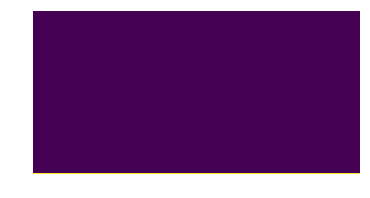

i= 1000 	x=327 	y=6 	yStart=17


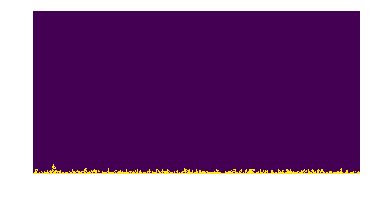

i= 2000 	x=86 	y=7 	yStart=22


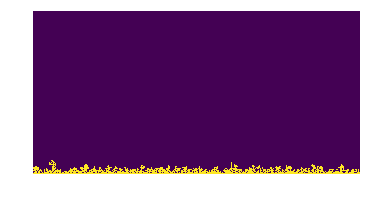

i= 3000 	x=180 	y=14 	yStart=29


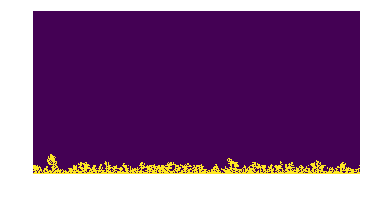

i= 4000 	x=219 	y=13 	yStart=33


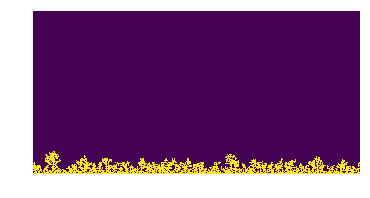

i= 5000 	x=61 	y=22 	yStart=41


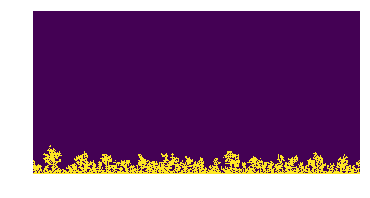

i= 6000 	x=165 	y=17 	yStart=45


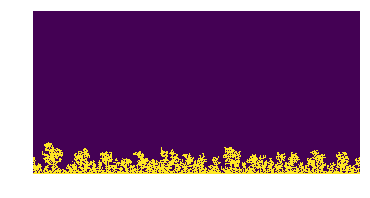

i= 7000 	x=284 	y=29 	yStart=49


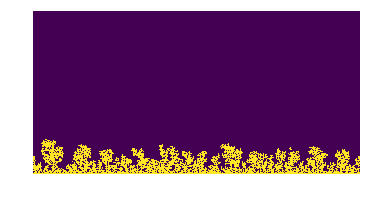

i= 8000 	x=144 	y=25 	yStart=55


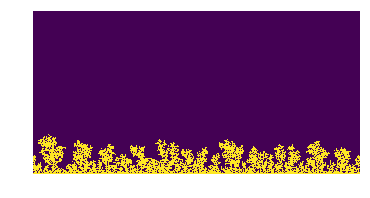

i= 9000 	x=43 	y=34 	yStart=62


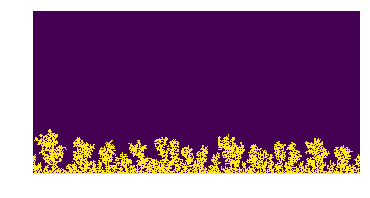

i= 10000 	x=273 	y=37 	yStart=67


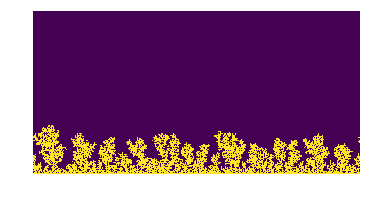

i= 11000 	x=68 	y=45 	yStart=72


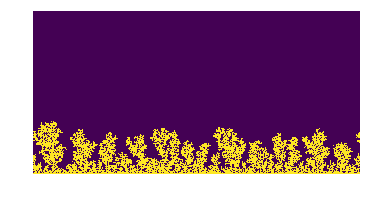

i= 12000 	x=133 	y=49 	yStart=79


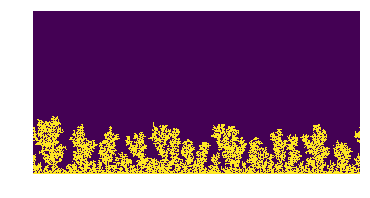

i= 13000 	x=229 	y=64 	yStart=83


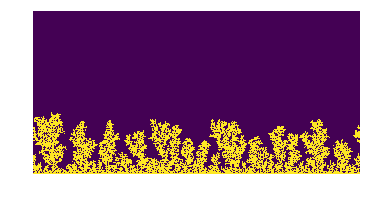

i= 14000 	x=101 	y=73 	yStart=90


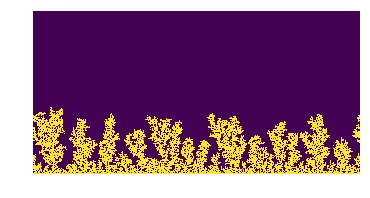

i= 15000 	x=158 	y=76 	yStart=99


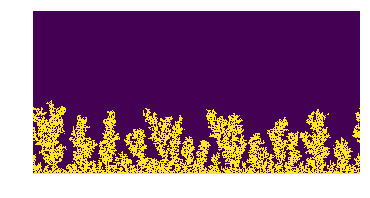

i= 16000 	x=271 	y=68 	yStart=103


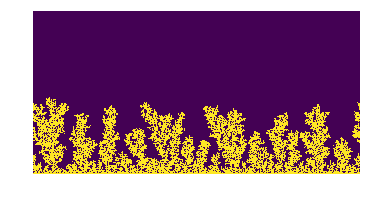

i= 17000 	x=216 	y=84 	yStart=107


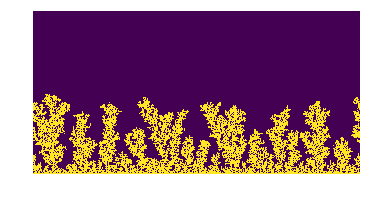

i= 18000 	x=84 	y=89 	yStart=112


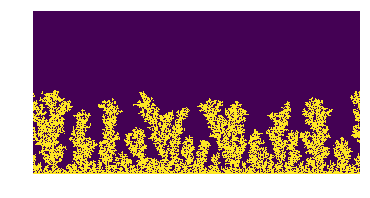

i= 19000 	x=9 	y=108 	yStart=119


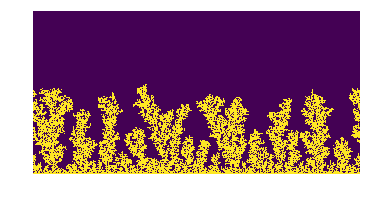

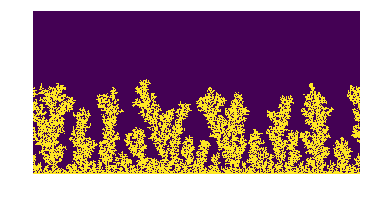

p is 1.0 %


In [5]:
for i in range(0,nParticles):
    # Compute new starting point on the line y=yStart
    x  = np.random.randint(0,maxX)
    y  = yStart; #always start at upper limit
    n=0
    P=p
    while True:
        xOrg = x
        yOrg = y

        r = np.random.random();
        # Random float:  0.0 <= r < 1.0
        #based on the value of 'r', move the particle
        #left, right, up, or down and change x and y accordingly
        ...
        if r<0.25:
            #left
            x=x-1
        else:
            if r<.50:
                #right
                x=x+1
            else:
                if r<.75:
                    #up
                    y=y+1
                else:
                    #down
                    y=y-1
            
        #now apply periodic boundary conditions to 'x'
        ...
        if(x<0):
            x=maxX-1
        if(x==maxX):
            x=0
        
        if (A[x,y] == 1 or y>yStart):
            #if p < np.random.random():
                x = xOrg
                y = yOrg
                continue; # if this site has been taken try moving in a different direction
        
        #determine the x coordionates of the left and right neighbors
        #store them in 'xm' and 'xp' and apply periodic boundary conditions again
        xp = (x+1)
        xm = (x-1)
        yp = (y+1)
        ym = (y-1)
        if(xp==maxX):
            xp=0
        if(xm<0):
            xm=maxX-1
        if(yp==maxY):
            yp=0
        if(ym<0):
            ym=maxY-1
        
        
        if A[xp,y]==1:
            n=n+1
        if A[xm,y]==1:
            n=n+1
        if A[x,yp]==1:
            n=n+1
        if A[x,ym]==1:
            n=n+1
        
        if n==2:
            P=p*10
        if n==3:
            P=p*20
        if n==4:
            P=p*30
        n=0
                    
        if np.random.random()<P:
        # Determine if any neighboring site is occupied
        # if that is the case, enter the following 'if' clause
            if (A[xp,y]==1 or A[xm,y]==1 or A[x,yp]==1 or A[x,ym]==1):
                
                A[x,y] = 1
                if (y+yBuffer>yStart and y+yBuffer<maxY): 
                    yStart = y+yBuffer

                if (i%1000==0): 
                    print(f'i= {i} \tx={x} \ty={y} \tyStart={yStart}')

                nNewParticlesPerFrame = 1000 
                if (i%nNewParticlesPerFrame==0): 
                    display(A)
                
                break # particle was attached, break out of current loop and insert next one
            
    if (yStart+1==maxY): 
        print(f'Structures reached Y limit after only {i} particles')

display(A)
print('p is',p*100,'%')        

i= 0 	x=112 	y=1 	yStart=6


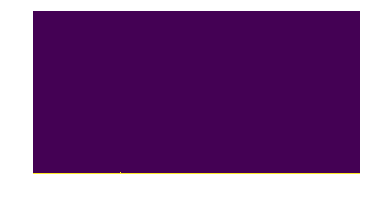

i= 1000 	x=238 	y=8 	yStart=14


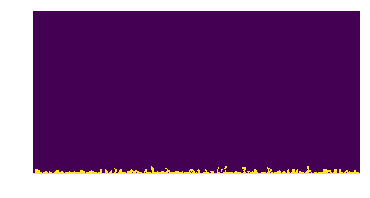

i= 2000 	x=33 	y=7 	yStart=23


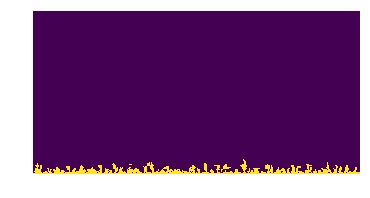

i= 3000 	x=74 	y=14 	yStart=28


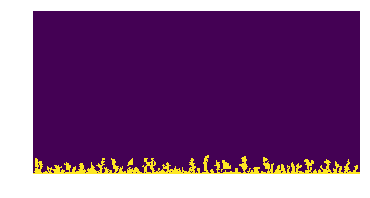

i= 4000 	x=86 	y=24 	yStart=38


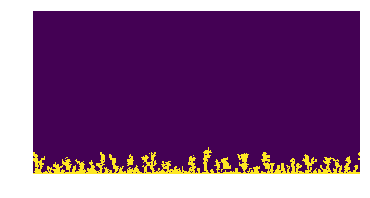

i= 5000 	x=297 	y=32 	yStart=45


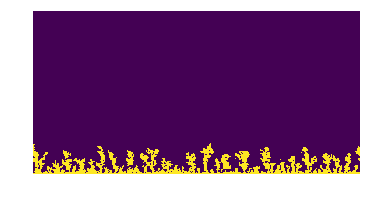

i= 6000 	x=344 	y=38 	yStart=52


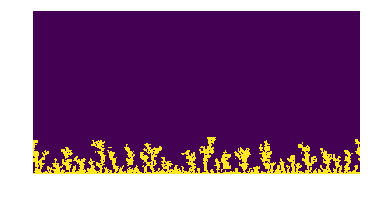

i= 7000 	x=79 	y=50 	yStart=58


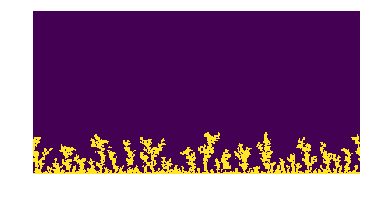

i= 8000 	x=198 	y=36 	yStart=67


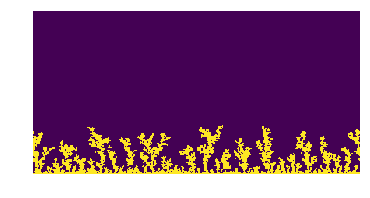

i= 9000 	x=347 	y=60 	yStart=74


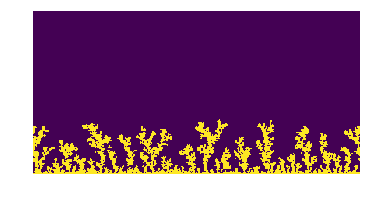

i= 10000 	x=286 	y=62 	yStart=87


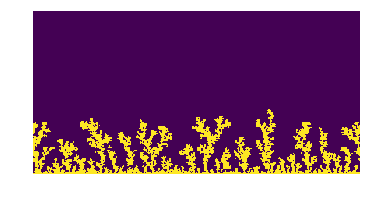

i= 11000 	x=245 	y=79 	yStart=94


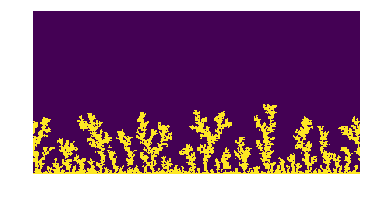

i= 12000 	x=67 	y=87 	yStart=102


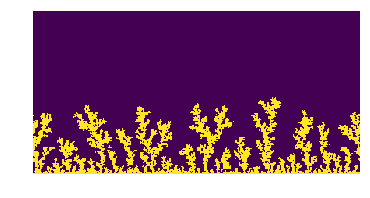

i= 13000 	x=203 	y=61 	yStart=108


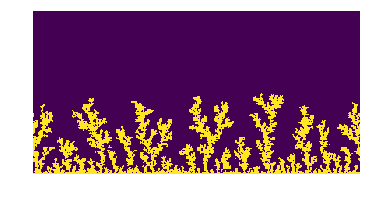

i= 14000 	x=58 	y=60 	yStart=115


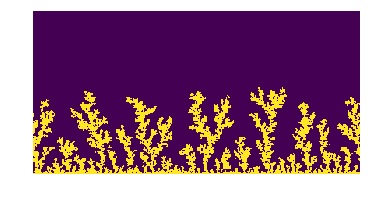

i= 15000 	x=355 	y=92 	yStart=122


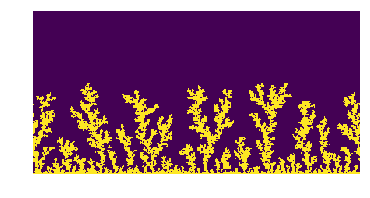

i= 16000 	x=409 	y=110 	yStart=129


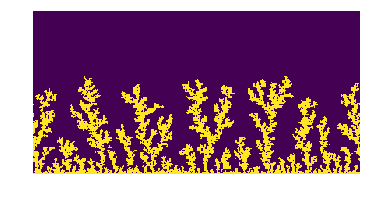

i= 17000 	x=118 	y=105 	yStart=137


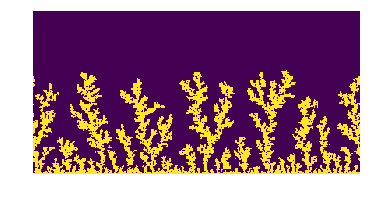

i= 18000 	x=221 	y=135 	yStart=148


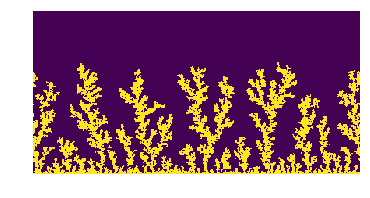

i= 19000 	x=337 	y=141 	yStart=154


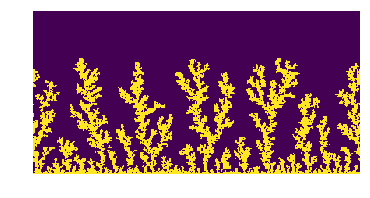

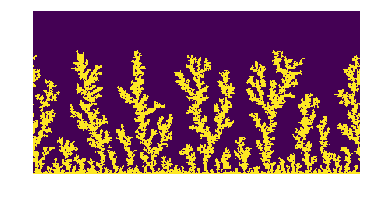

p is 10.0 %


In [6]:
yBuffer = 5
yStart  = 1 + yBuffer
nParticles = 20000
maxX = 420
maxY = 210
A = np.zeros((maxX, maxY))
A[:,0] = 1
#print(A.transpose())
p=0.1


for i in range(0,nParticles):
    # Compute new starting point on the line y=yStart
    x  = np.random.randint(0,maxX)
    y  = yStart; #always start at upper limit
    n=0
    P=p
    while True:
        xOrg = x
        yOrg = y

        r = np.random.random(); 
        # Random float:  0.0 <= r < 1.0
        #based on the value of 'r', move the particle
        #left, right, up, or down and change x and y accordingly
        ...
        if r<0.25:
            #left
            x=x-1
        else:
            if r<.50:
                #right
                x=x+1
            else:
                if r<.75:
                    #up
                    y=y+1
                else:
                    #down
                    y=y-1
            
        #now apply periodic boundary conditions to 'x'
        ...
        if(x<0):
            x=maxX-1
        if(x==maxX):
            x=0
        
        if (A[x,y] == 1 or y>yStart):
            #if p < np.random.random():
                x = xOrg
                y = yOrg
                continue; # if this site has been taken try moving in a different direction
        
        #determine the x coordionates of the left and right neighbors
        #store them in 'xm' and 'xp' and apply periodic boundary conditions again
        xp = (x+1)
        xm = (x-1)
        yp = (y+1)
        ym = (y-1)
        if(xp==maxX):
            xp=0
        if(xm<0):
            xm=maxX-1
        if(yp==maxY):
            yp=0
        if(ym<0):
            ym=maxY-1
        
        
        if A[xp,y]==1:
            n=n+1
        if A[xm,y]==1:
            n=n+1
        if A[x,yp]==1:
            n=n+1
        if A[x,ym]==1:
            n=n+1
        
        if n==2:
            P=p*10
        if n==3:
            P=p*20
        if n==4:
            P=p*30
        n=0
                    
        if np.random.random()<P:
            
            
        # Determine if any neighboring site is occupied
        # if that is the case, enter the following 'if' clause
            if (A[xp,y]==1 or A[xm,y]==1 or A[x,yp]==1 or A[x,ym]==1):
                
                A[x,y] = 1
                if (y+yBuffer>yStart and y+yBuffer<maxY): 
                    yStart = y+yBuffer

                if (i%1000==0): 
                    print(f'i= {i} \tx={x} \ty={y} \tyStart={yStart}')

                nNewParticlesPerFrame = 1000 
                if (i%nNewParticlesPerFrame==0): 
                    display(A)
                
                break # particle was attached, break out of current loop and insert next one
            
    if (yStart+1==maxY): 
        print(f'Structures reached Y limit after only {i} particles')

display(A)
print('p is',p*100,'%')        

i= 0 	x=61 	y=1 	yStart=6


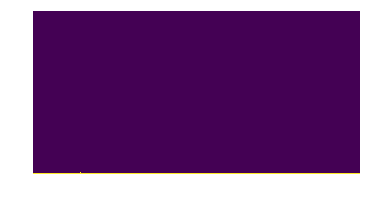

i= 1000 	x=248 	y=2 	yStart=14


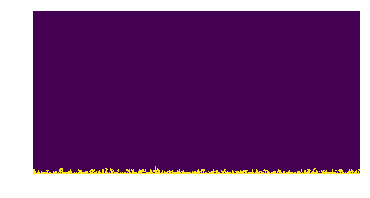

i= 2000 	x=220 	y=8 	yStart=18


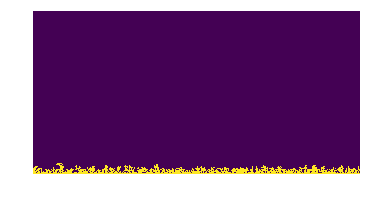

i= 3000 	x=196 	y=8 	yStart=23


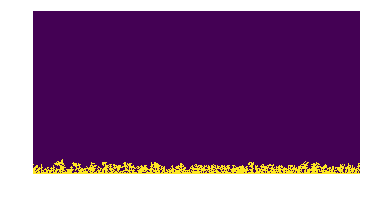

i= 4000 	x=364 	y=20 	yStart=28


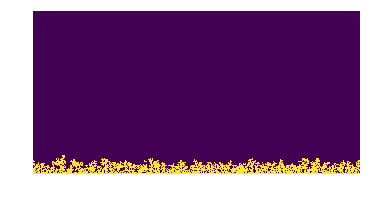

i= 5000 	x=416 	y=20 	yStart=32


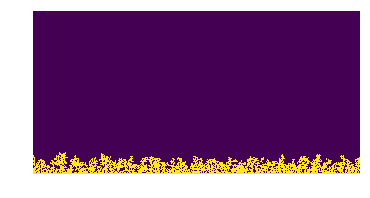

i= 6000 	x=210 	y=26 	yStart=36


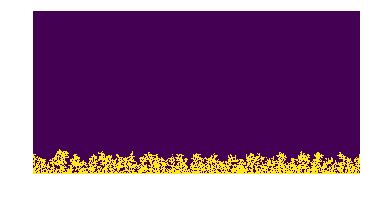

i= 7000 	x=232 	y=32 	yStart=40


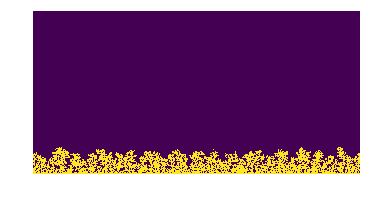

i= 8000 	x=232 	y=35 	yStart=45


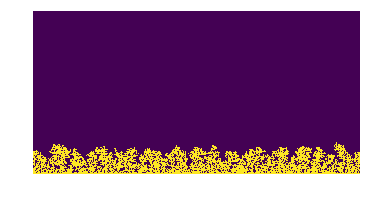

i= 9000 	x=374 	y=33 	yStart=51


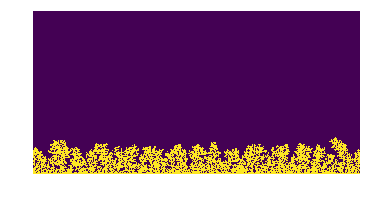

i= 10000 	x=250 	y=31 	yStart=55


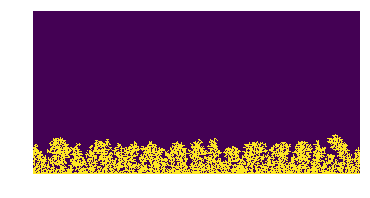

i= 11000 	x=315 	y=42 	yStart=61


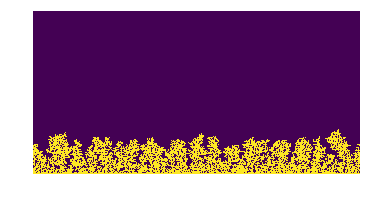

i= 12000 	x=161 	y=39 	yStart=67


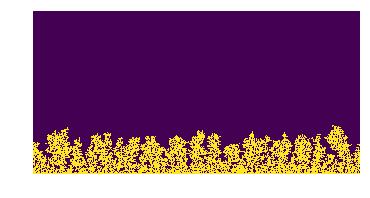

i= 13000 	x=198 	y=41 	yStart=71


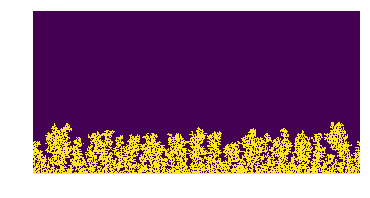

i= 14000 	x=157 	y=56 	yStart=75


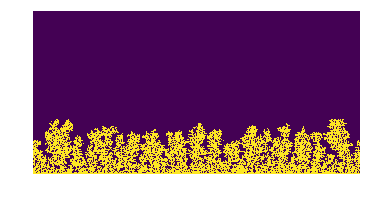

i= 15000 	x=403 	y=60 	yStart=80


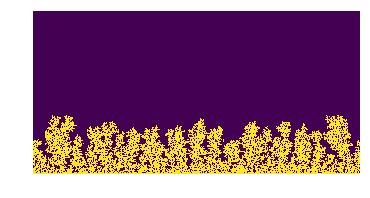

i= 16000 	x=288 	y=70 	yStart=85


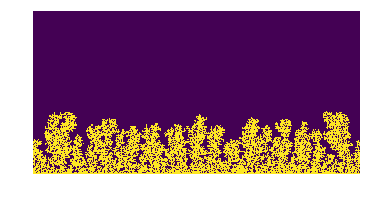

i= 17000 	x=106 	y=76 	yStart=89


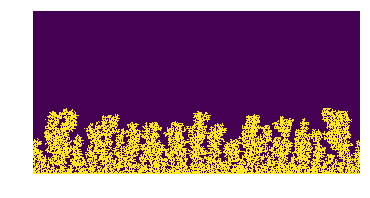

i= 18000 	x=293 	y=75 	yStart=93


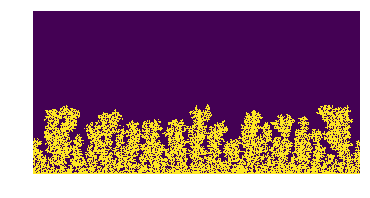

i= 19000 	x=97 	y=80 	yStart=99


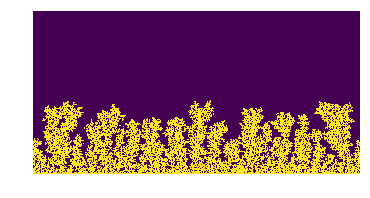

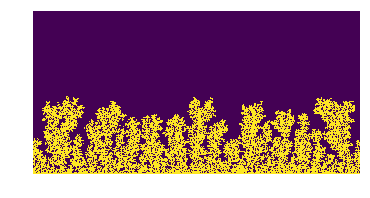

p is 0.5 %


In [8]:
yBuffer = 5
yStart  = 1 + yBuffer
nParticles = 20000
maxX = 420
maxY = 210
A = np.zeros((maxX, maxY))
A[:,0] = 1
#print(A.transpose())
p=0.005


for i in range(0,nParticles):
    # Compute new starting point on the line y=yStart
    x  = np.random.randint(0,maxX)
    y  = yStart; #always start at upper limit
    n=0
    P=p
    while True:
        xOrg = x
        yOrg = y

        r = np.random.random();
        # Random float:  0.0 <= r < 1.0
        #based on the value of 'r', move the particle
        #left, right, up, or down and change x and y accordingly
        ...
        if r<0.25:
            #left
            x=x-1
        else:
            if r<.50:
                #right
                x=x+1
            else:
                if r<.75:
                    #up
                    y=y+1
                else:
                    #down
                    y=y-1
            
        #now apply periodic boundary conditions to 'x'
        ...
        if(x<0):
            x=maxX-1
        if(x==maxX):
            x=0
        
        if (A[x,y] == 1 or y>yStart):
            #if p < np.random.random():
                x = xOrg
                y = yOrg
                continue; # if this site has been taken try moving in a different direction
        
        #determine the x coordionates of the left and right neighbors
        #store them in 'xm' and 'xp' and apply periodic boundary conditions again
        xp = (x+1)
        xm = (x-1)
        yp = (y+1)
        ym = (y-1)
        if(xp==maxX):
            xp=0
        if(xm<0):
            xm=maxX-1
        if(yp==maxY):
            yp=0
        if(ym<0):
            ym=maxY-1
        
        
        if A[xp,y]==1:
            n=n+1
        if A[xm,y]==1:
            n=n+1
        if A[x,yp]==1:
            n=n+1
        if A[x,ym]==1:
            n=n+1
        
        if n==2:
            P=p*10
        if n==3:
            P=p*20
        if n==4:
            P=p*30
        n=0
                    
        if np.random.random()<P:
            
            
        # Determine if any neighboring site is occupied
        # if that is the case, enter the following 'if' clause
            if (A[xp,y]==1 or A[xm,y]==1 or A[x,yp]==1 or A[x,ym]==1):
                
                A[x,y] = 1
                if (y+yBuffer>yStart and y+yBuffer<maxY): 
                    yStart = y+yBuffer

                if (i%1000==0): 
                    print(f'i= {i} \tx={x} \ty={y} \tyStart={yStart}')

                nNewParticlesPerFrame = 1000 
                if (i%nNewParticlesPerFrame==0): 
                    display(A)
                
                break # particle was attached, break out of current loop and insert next one
            
    if (yStart+1==maxY): 
        print(f'Structures reached Y limit after only {i} particles')

display(A)
print('p is',p*100,'%')        

i= 0 	x=274 	y=1 	yStart=6


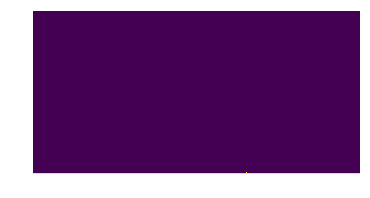

i= 1000 	x=329 	y=6 	yStart=13


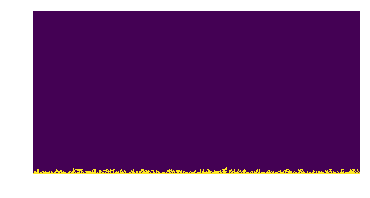

i= 2000 	x=157 	y=7 	yStart=18


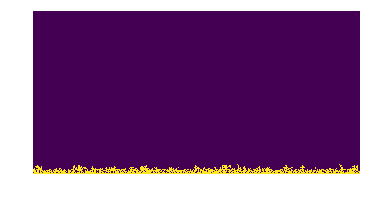

i= 3000 	x=141 	y=12 	yStart=21


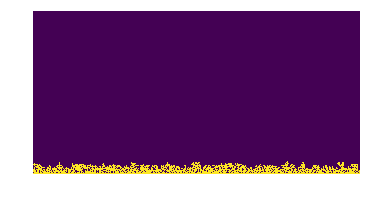

i= 4000 	x=124 	y=14 	yStart=26


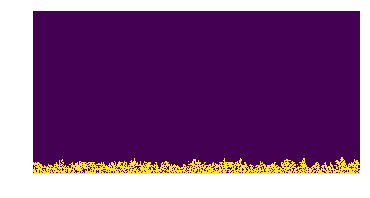

i= 5000 	x=41 	y=13 	yStart=30


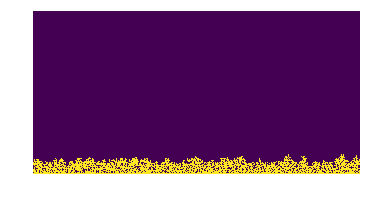

i= 6000 	x=326 	y=27 	yStart=35


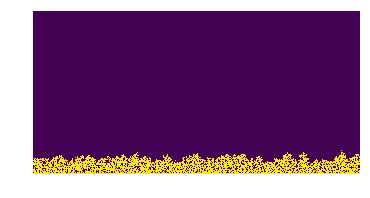

i= 7000 	x=173 	y=27 	yStart=39


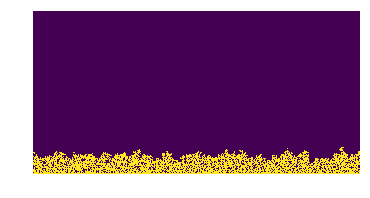

i= 8000 	x=198 	y=27 	yStart=43


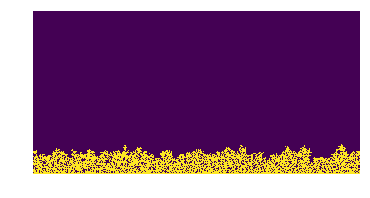

i= 9000 	x=162 	y=23 	yStart=47


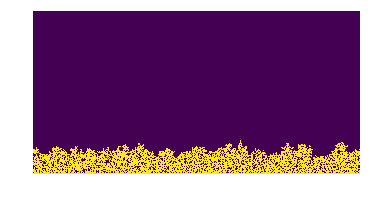

i= 10000 	x=391 	y=44 	yStart=49


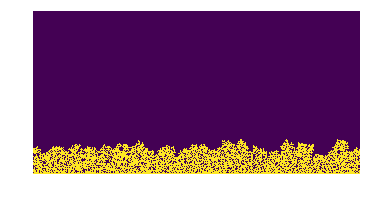

i= 11000 	x=68 	y=37 	yStart=52


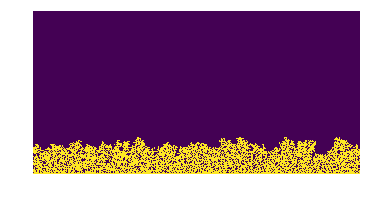

i= 12000 	x=9 	y=36 	yStart=56


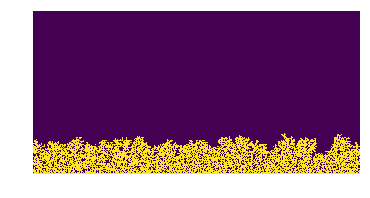

i= 13000 	x=315 	y=43 	yStart=61


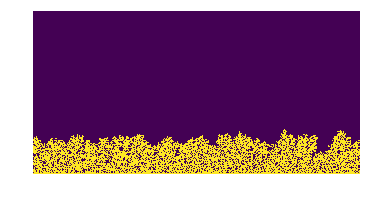

i= 14000 	x=63 	y=50 	yStart=65


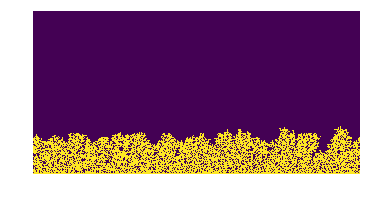

i= 15000 	x=310 	y=46 	yStart=69


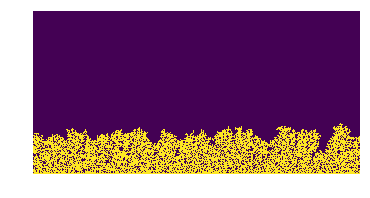

i= 16000 	x=109 	y=57 	yStart=72


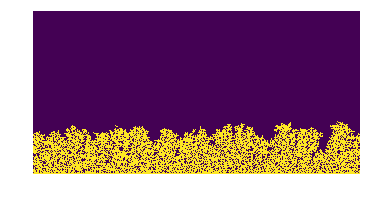

i= 17000 	x=98 	y=58 	yStart=76


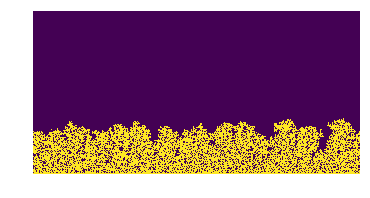

i= 18000 	x=377 	y=60 	yStart=79


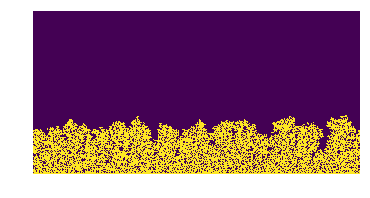

i= 19000 	x=208 	y=68 	yStart=84


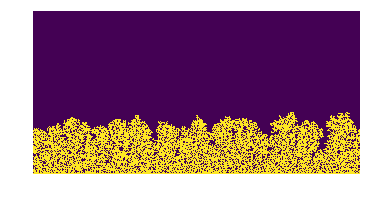

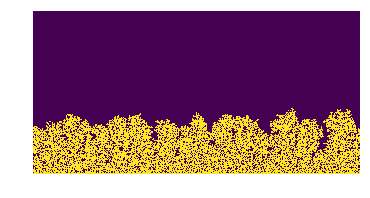

p is 0.1 %


In [7]:
yBuffer = 5
yStart  = 1 + yBuffer
nParticles = 20000
maxX = 420
maxY = 210
A = np.zeros((maxX, maxY))
A[:,0] = 1
#print(A.transpose())
p=0.001

for i in range(0,nParticles):
    # Compute new starting point on the line y=yStart
    x  = np.random.randint(0,maxX)
    y  = yStart; #always start at upper limit
    n=0
    P=p
    while True:
        xOrg = x
        yOrg = y

        r = np.random.random(); 
        # Random float:  0.0 <= r < 1.0
        #based on the value of 'r', move the particle
        #left, right, up, or down and change x and y accordingly
        ...
        if r<0.25:
            #left
            x=x-1
        else:
            if r<.50:
                #right
                x=x+1
            else:
                if r<.75:
                    #up
                    y=y+1
                else:
                    #down
                    y=y-1
            
        #now apply periodic boundary conditions to 'x'
        ...
        if(x<0):
            x=maxX-1
        if(x==maxX):
            x=0
        
        if (A[x,y] == 1 or y>yStart):
            #if p < np.random.random():
                x = xOrg
                y = yOrg
                continue; # if this site has been taken try moving in a different direction
        
        #determine the x coordionates of the left and right neighbors
        #store them in 'xm' and 'xp' and apply periodic boundary conditions again
        xp = (x+1)
        xm = (x-1)
        yp = (y+1)
        ym = (y-1)
        if(xp==maxX):
            xp=0
        if(xm<0):
            xm=maxX-1
        if(yp==maxY):
            yp=0
        if(ym<0):
            ym=maxY-1
        
        
        if A[xp,y]==1:
            n=n+1
        if A[xm,y]==1:
            n=n+1
        if A[x,yp]==1:
            n=n+1
        if A[x,ym]==1:
            n=n+1
        
        if n==2:
            P=p*10
        if n==3:
            P=p*20
        if n==4:
            P=p*30
        n=0
                    
        if np.random.random()<P:
            
            
        # Determine if any neighboring site is occupied
        # if that is the case, enter the following 'if' clause
            if (A[xp,y]==1 or A[xm,y]==1 or A[x,yp]==1 or A[x,ym]==1):
                
                A[x,y] = 1
                if (y+yBuffer>yStart and y+yBuffer<maxY): 
                    yStart = y+yBuffer

                if (i%1000==0): 
                    print(f'i= {i} \tx={x} \ty={y} \tyStart={yStart}')

                nNewParticlesPerFrame = 1000 
                if (i%nNewParticlesPerFrame==0): 
                    display(A)
                
                break # particle was attached, break out of current loop and insert next one
            
    if (yStart+1==maxY): 
        print(f'Structures reached Y limit after only {i} particles')

display(A)
print('p is',p*100,'%')        

i= 0 	x=331 	y=1 	yStart=6


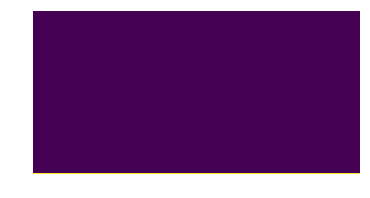

i= 1000 	x=171 	y=4 	yStart=12


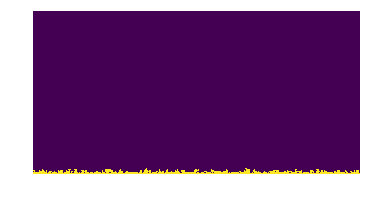

i= 2000 	x=383 	y=6 	yStart=19


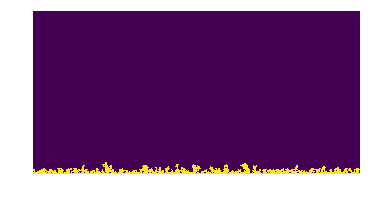

i= 3000 	x=13 	y=14 	yStart=28


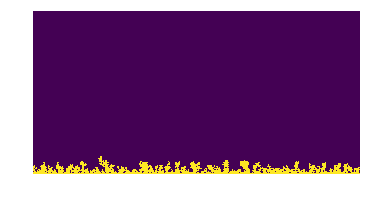

i= 4000 	x=400 	y=13 	yStart=34


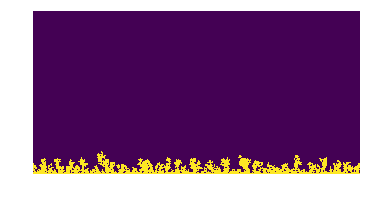

i= 5000 	x=207 	y=30 	yStart=37


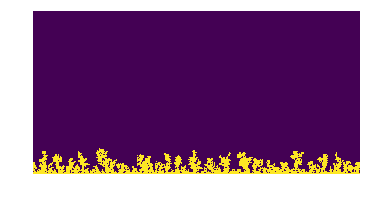

i= 6000 	x=78 	y=35 	yStart=45


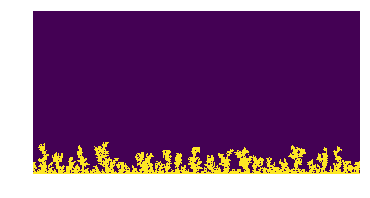

i= 7000 	x=276 	y=33 	yStart=52


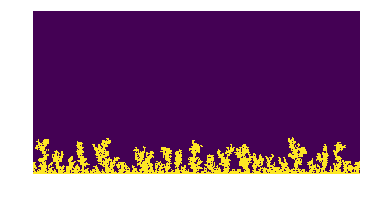

i= 8000 	x=2 	y=32 	yStart=57


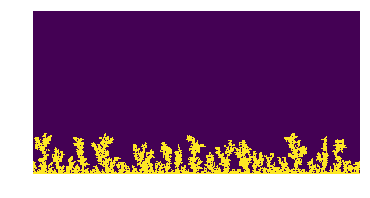

i= 9000 	x=206 	y=52 	yStart=65


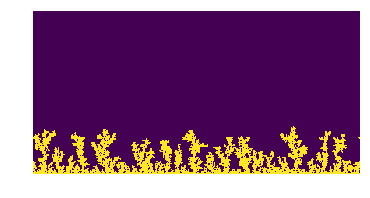

i= 10000 	x=248 	y=52 	yStart=74


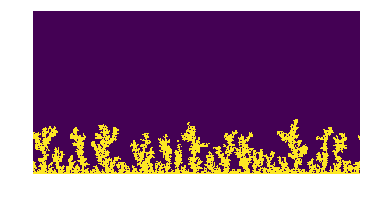

i= 11000 	x=218 	y=40 	yStart=85


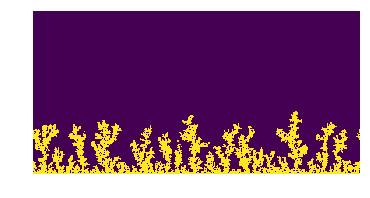

i= 12000 	x=28 	y=69 	yStart=93


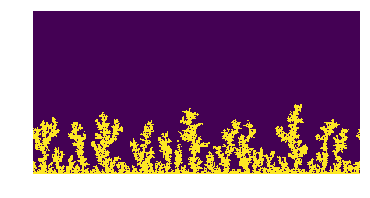

i= 13000 	x=54 	y=70 	yStart=101


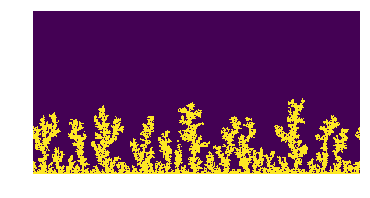

i= 14000 	x=282 	y=61 	yStart=105


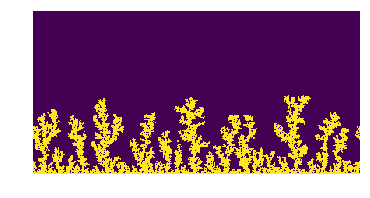

i= 15000 	x=139 	y=73 	yStart=113


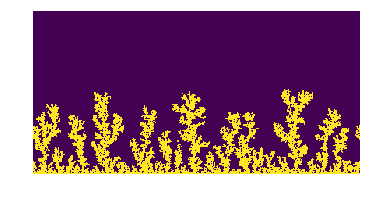

i= 16000 	x=327 	y=111 	yStart=118


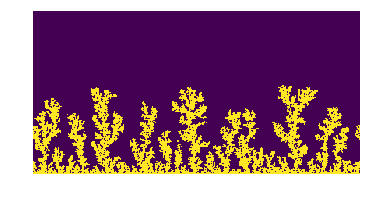

i= 17000 	x=72 	y=104 	yStart=127


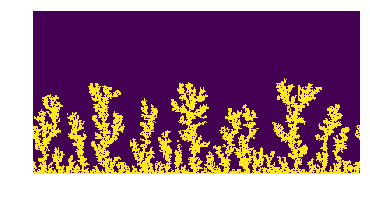

i= 18000 	x=30 	y=94 	yStart=136


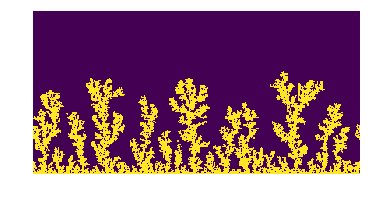

i= 19000 	x=194 	y=127 	yStart=142


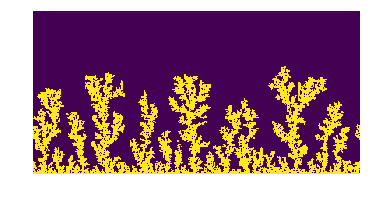

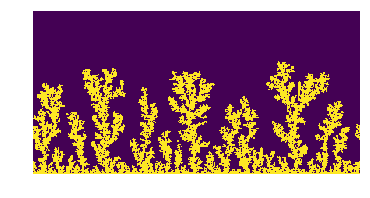

p is 5.0 %


In [9]:
yBuffer = 5
yStart  = 1 + yBuffer
nParticles = 20000
maxX = 420
maxY = 210
A = np.zeros((maxX, maxY))
A[:,0] = 1
#print(A.transpose())
p=0.05


for i in range(0,nParticles):
    # Compute new starting point on the line y=yStart
    x  = np.random.randint(0,maxX)
    y  = yStart; #always start at upper limit
    n=0
    P=p
    while True:
        xOrg = x
        yOrg = y

        r = np.random.random();
        # Random float:  0.0 <= r < 1.0
        #based on the value of 'r', move the particle
        #left, right, up, or down and change x and y accordingly
        ...
        if r<0.25:
            #left
            x=x-1
        else:
            if r<.50:
                #right
                x=x+1
            else:
                if r<.75:
                    #up
                    y=y+1
                else:
                    #down
                    y=y-1
            
        #now apply periodic boundary conditions to 'x'
        ...
        if(x<0):
            x=maxX-1
        if(x==maxX):
            x=0
        
        if (A[x,y] == 1 or y>yStart):
            #if p < np.random.random():
                x = xOrg
                y = yOrg
                continue; # if this site has been taken try moving in a different direction
        
        #determine the x coordionates of the left and right neighbors
        #store them in 'xm' and 'xp' and apply periodic boundary conditions again
        xp = (x+1)
        xm = (x-1)
        yp = (y+1)
        ym = (y-1)
        if(xp==maxX):
            xp=0
        if(xm<0):
            xm=maxX-1
        if(yp==maxY):
            yp=0
        if(ym<0):
            ym=maxY-1
        
        
        if A[xp,y]==1:
            n=n+1
        if A[xm,y]==1:
            n=n+1
        if A[x,yp]==1:
            n=n+1
        if A[x,ym]==1:
            n=n+1
        
        if n==2:
            P=p*10
        if n==3:
            P=p*20
        if n==4:
            P=p*30
        n=0
                    
        if np.random.random()<P:
            
            
        # Determine if any neighboring site is occupied
        # if that is the case, enter the following 'if' clause
            if (A[xp,y]==1 or A[xm,y]==1 or A[x,yp]==1 or A[x,ym]==1):
                
                A[x,y] = 1
                if (y+yBuffer>yStart and y+yBuffer<maxY): 
                    yStart = y+yBuffer

                if (i%1000==0): 
                    print(f'i= {i} \tx={x} \ty={y} \tyStart={yStart}')

                nNewParticlesPerFrame = 1000 
                if (i%nNewParticlesPerFrame==0): 
                    display(A)
                
                break # particle was attached, break out of current loop and insert next one
            
    if (yStart+1==maxY): 
        print(f'Structures reached Y limit after only {i} particles')

display(A)
print('p is',p*100,'%')        

i= 0 	x=307 	y=1 	yStart=6


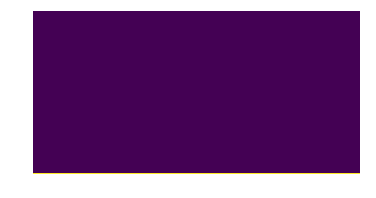

i= 1000 	x=123 	y=7 	yStart=26


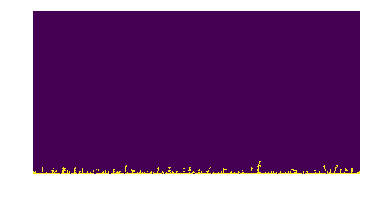

i= 2000 	x=446 	y=25 	yStart=42


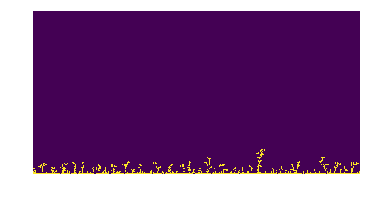

i= 3000 	x=349 	y=48 	yStart=53


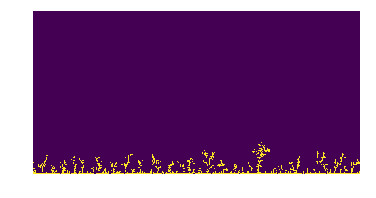

i= 4000 	x=66 	y=33 	yStart=63


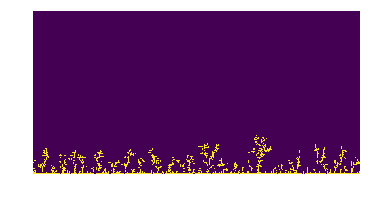

i= 5000 	x=177 	y=48 	yStart=74


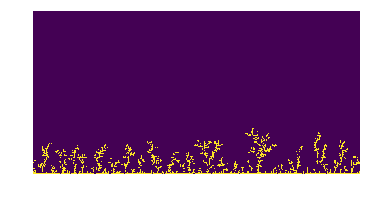

i= 6000 	x=175 	y=59 	yStart=83


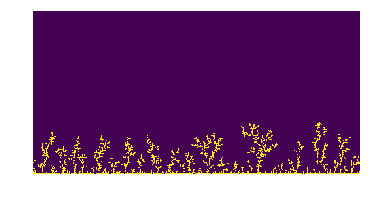

i= 7000 	x=442 	y=83 	yStart=94


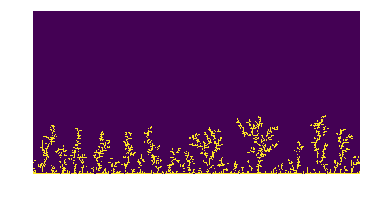

i= 8000 	x=182 	y=82 	yStart=102


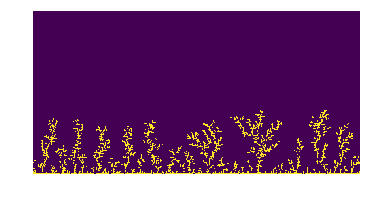

i= 9000 	x=186 	y=96 	yStart=119


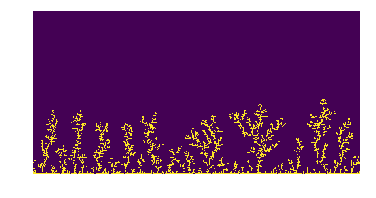

i= 10000 	x=141 	y=87 	yStart=127


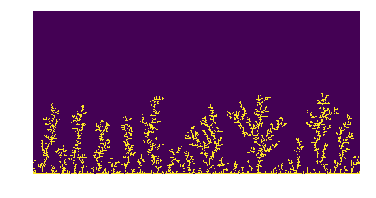

i= 11000 	x=89 	y=112 	yStart=140


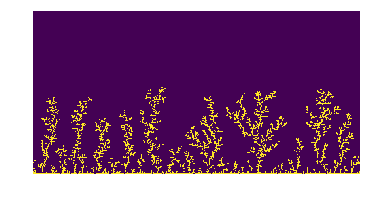

i= 12000 	x=452 	y=135 	yStart=152


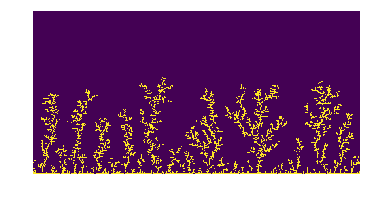

i= 13000 	x=376 	y=149 	yStart=163


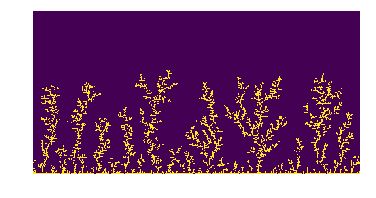

i= 14000 	x=40 	y=142 	yStart=176


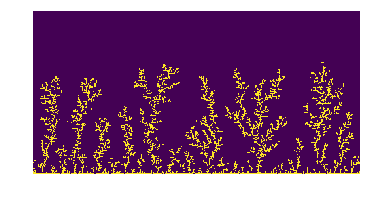

i= 15000 	x=421 	y=146 	yStart=180


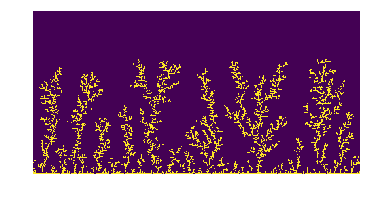

i= 16000 	x=148 	y=172 	yStart=191


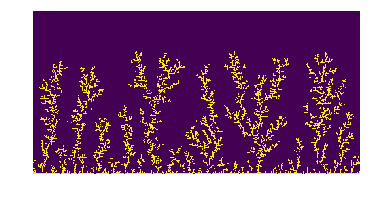

i= 17000 	x=363 	y=189 	yStart=202


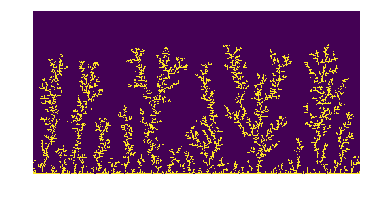

i= 18000 	x=290 	y=164 	yStart=214


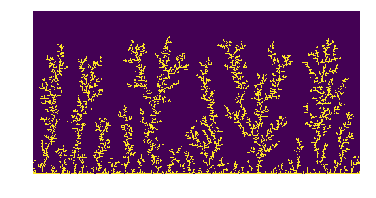

i= 19000 	x=134 	y=175 	yStart=224


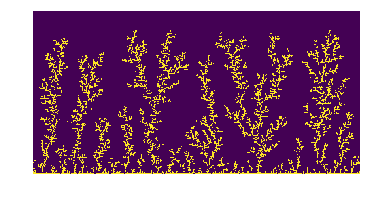

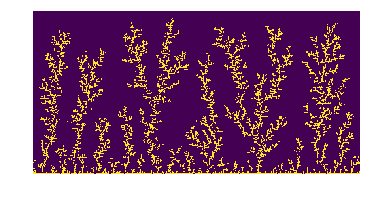

q is 20.0 %


In [10]:
yBuffer = 5
yStart  = 1 + yBuffer
nParticles = 20000
maxX = 500
maxY = 250
A = np.zeros((maxX, maxY))
A[:,0] = 1
#print(A.transpose())
q=.20


for i in range(0,nParticles):
    # Compute new starting point on the line y=yStart
    x  = np.random.randint(0,maxX)
    y  = yStart; #always start at upper limit
    n=0
    P=p
    while True:
        xOrg = x
        yOrg = y

        r = np.random.random(); # Random float:  0.0 <= r < 1.0
        #based on the value of 'r', move the particle
        #left, right, up, or down and change x and y accordingly
        ...
        if r<0.25:
            #left
            x=x-1
        else:
            if r<.50:
                #right
                x=x+1
            else:
                if r<.75:
                    #up
                    y=y+1
                else:
                    #down
                    y=y-1
            
        #now apply periodic boundary conditions to 'x'
        ...
        if(x<0):
            x=maxX-1
        if(x==maxX):
            x=0
        
        if (A[x,y] == 1 or y>yStart):
            #if p < np.random.random():
                x = xOrg
                y = yOrg
                continue; # if this site has been taken try moving in a different direction
        
        #determine the x coordionates of the left and right neighbors
        #store them in 'xm' and 'xp' and apply periodic boundary conditions again
        xp = (x+1)
        xm = (x-1)
        yp = (y+1)
        ym = (y-1)
        if(xp==maxX):
            xp=0
        if(xm<0):
            xm=maxX-1
        if(yp==maxY):
            yp=0
        if(ym<0):
            ym=maxY-1
        
                            
        
            
            
        # Determine if any neighboring site is occupied
        # if that is the case, enter the following 'if' clause
        if (A[xp,y]==1 or A[xm,y]==1 or A[x,yp]==1 or A[x,ym]==1):
            if np.random.random()<q:
                if A[xp,y]==1 and y!=1:
                    A[xp,y]=0
                if A[xm,y]==1 and y!=1:
                    A[xm,y]=0
                if A[x,yp]==1 and yp!=1:
                    A[x,yp]=0
                if A[x,ym]==1 and ym!=1:
                    A[x,ym]=0
            else:
                A[x,y] = 1
                if (y+yBuffer>yStart and y+yBuffer<maxY): 
                    yStart = y+yBuffer

                if (i%1000==0): 
                    print(f'i= {i} \tx={x} \ty={y} \tyStart={yStart}')

                nNewParticlesPerFrame = 1000 
                if (i%nNewParticlesPerFrame==0): 
                    display(A)
                
                break # particle was attached, break out of current loop and insert next one
            
    if (yStart+1==maxY): 
        print(f'Structures reached Y limit after only {i} particles')

display(A)
print('q is',q*100,'%')        

i= 0 	x=329 	y=1 	yStart=6


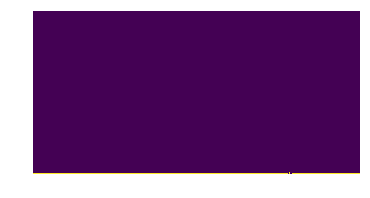

i= 1000 	x=380 	y=3 	yStart=16


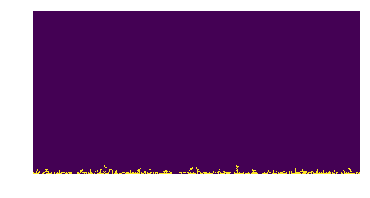

i= 2000 	x=199 	y=8 	yStart=24


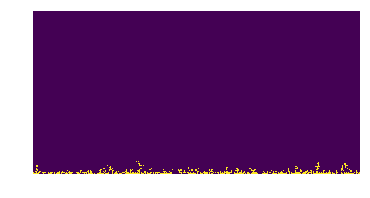

i= 3000 	x=10 	y=4 	yStart=25


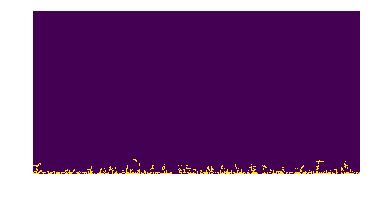

i= 4000 	x=275 	y=20 	yStart=32


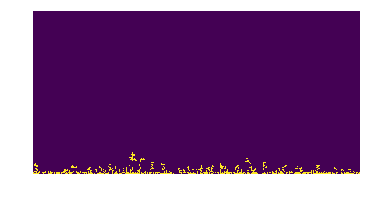

i= 5000 	x=195 	y=6 	yStart=40


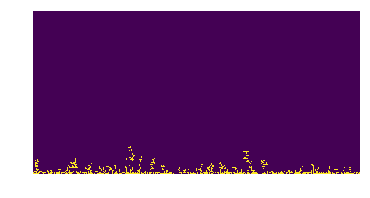

i= 6000 	x=400 	y=7 	yStart=45


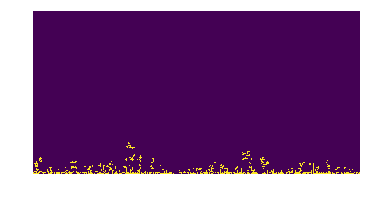

i= 7000 	x=270 	y=31 	yStart=56


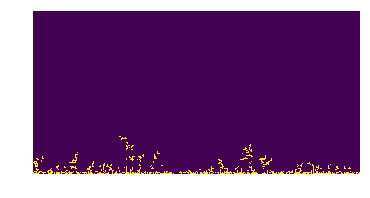

i= 8000 	x=73 	y=14 	yStart=57


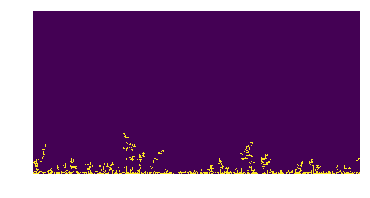

i= 9000 	x=50 	y=16 	yStart=64


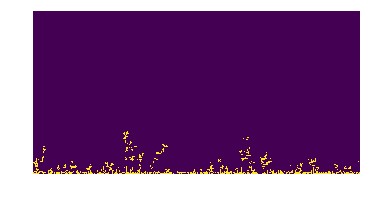

i= 10000 	x=388 	y=14 	yStart=64


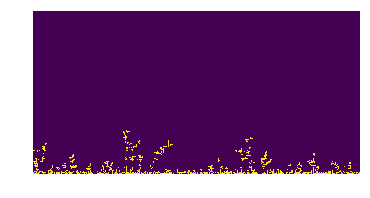

i= 11000 	x=166 	y=32 	yStart=64


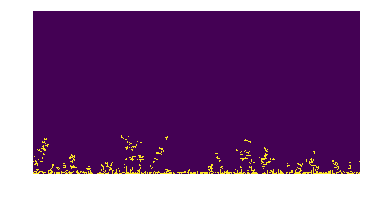

i= 12000 	x=365 	y=27 	yStart=64


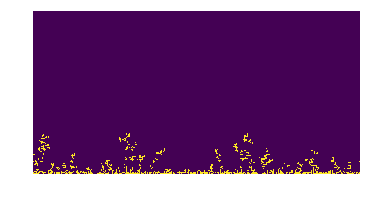

i= 13000 	x=67 	y=9 	yStart=72


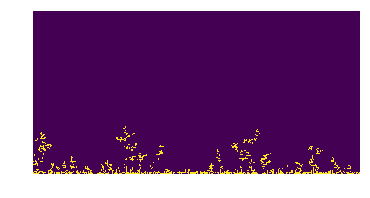

i= 14000 	x=26 	y=15 	yStart=72


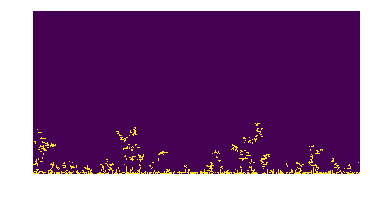

i= 15000 	x=109 	y=64 	yStart=75


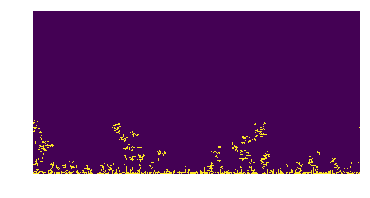

i= 16000 	x=129 	y=57 	yStart=76


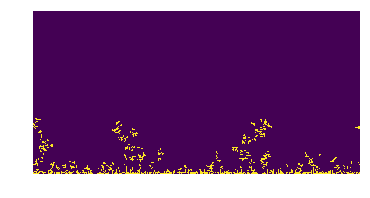

i= 17000 	x=298 	y=55 	yStart=79


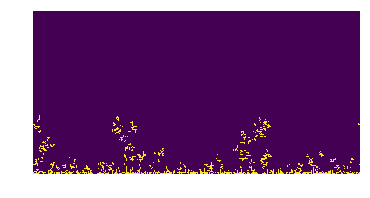

i= 18000 	x=414 	y=62 	yStart=87


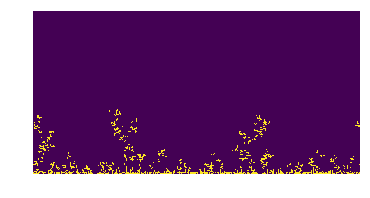

i= 19000 	x=9 	y=46 	yStart=96


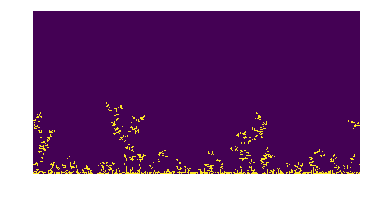

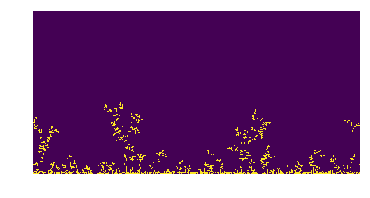

q is 45.0 %


In [11]:
yBuffer = 5
yStart  = 1 + yBuffer
nParticles = 20000
maxX = 420
maxY = 210
A = np.zeros((maxX, maxY))
A[:,0] = 1
#print(A.transpose())
q=.45


for i in range(0,nParticles):
    # Compute new starting point on the line y=yStart
    x  = np.random.randint(0,maxX)
    y  = yStart; #always start at upper limit
    n=0
    P=p
    while True:
        xOrg = x
        yOrg = y

        r = np.random.random(); # Random float:  0.0 <= r < 1.0
        #based on the value of 'r', move the particle
        #left, right, up, or down and change x and y accordingly
        ...
        if r<0.25:
            #left
            x=x-1
        else:
            if r<.50:
                #right
                x=x+1
            else:
                if r<.75:
                    #up
                    y=y+1
                else:
                    #down
                    y=y-1
            
        #now apply periodic boundary conditions to 'x'
        ...
        if(x<0):
            x=maxX-1
        if(x==maxX):
            x=0
        
        if (A[x,y] == 1 or y>yStart):
            #if p < np.random.random():
                x = xOrg
                y = yOrg
                continue; # if this site has been taken try moving in a different direction
        
        #determine the x coordionates of the left and right neighbors
        #store them in 'xm' and 'xp' and apply periodic boundary conditions again
        xp = (x+1)
        xm = (x-1)
        yp = (y+1)
        ym = (y-1)
        if(xp==maxX):
            xp=0
        if(xm<0):
            xm=maxX-1
        if(yp==maxY):
            yp=0
        if(ym<0):
            ym=maxY-1
        
                            
        
            
            
        # Determine if any neighboring site is occupied
        # if that is the case, enter the following 'if' clause
        if (A[xp,y]==1 or A[xm,y]==1 or A[x,yp]==1 or A[x,ym]==1):
            if np.random.random()<q:
                if A[xp,y]==1 and y!=1:
                    A[xp,y]=0
                if A[xm,y]==1 and y!=1:
                    A[xm,y]=0
                if A[x,yp]==1 and yp!=1:
                    A[x,yp]=0
                if A[x,ym]==1 and ym!=1:
                    A[x,ym]=0
            else:
                A[x,y] = 1
                if (y+yBuffer>yStart and y+yBuffer<maxY): 
                    yStart = y+yBuffer

                if (i%1000==0): 
                    print(f'i= {i} \tx={x} \ty={y} \tyStart={yStart}')

                nNewParticlesPerFrame = 1000 
                if (i%nNewParticlesPerFrame==0): 
                    display(A)
                
                break # particle was attached, break out of current loop and insert next one
            
    if (yStart+1==maxY): 
        print(f'Structures reached Y limit after only {i} particles')

display(A)
print('q is',q*100,'%')        

In [12]:
# q(crit) is about 47%. The rate of grouth and chemical reactions seem to be canceling each other out.

i= 0 	x=311 	y=1 	yStart=6


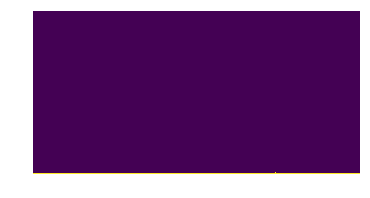

i= 1000 	x=276 	y=-33 	yStart=15


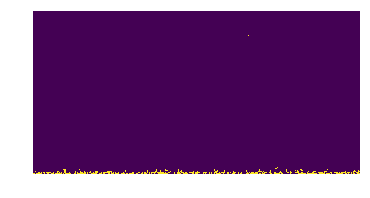

i= 2000 	x=347 	y=10 	yStart=18


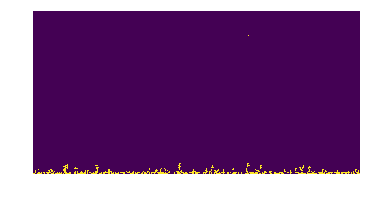

i= 3000 	x=84 	y=6 	yStart=25


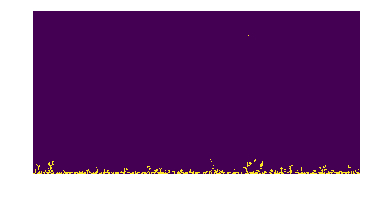

i= 4000 	x=296 	y=17 	yStart=33


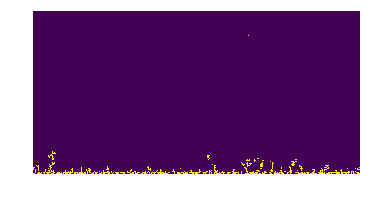

i= 5000 	x=234 	y=22 	yStart=35


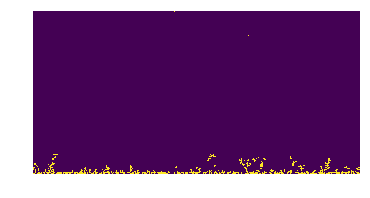

i= 6000 	x=222 	y=21 	yStart=36


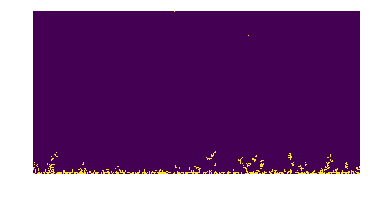

i= 7000 	x=230 	y=31 	yStart=39


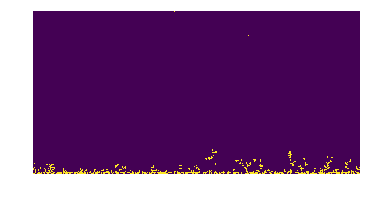

i= 8000 	x=226 	y=33 	yStart=43


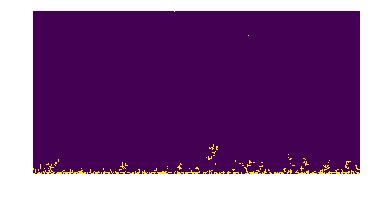

i= 9000 	x=417 	y=6 	yStart=44


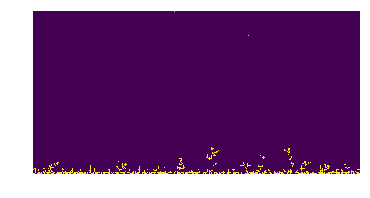

i= 10000 	x=238 	y=26 	yStart=44


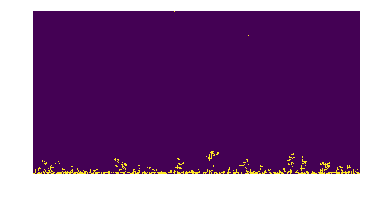

i= 11000 	x=354 	y=16 	yStart=44


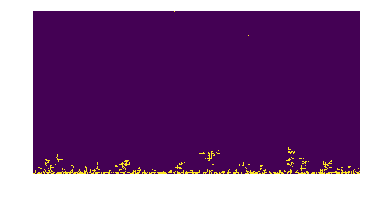

i= 12000 	x=224 	y=30 	yStart=44


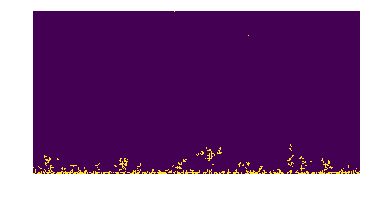

i= 13000 	x=14 	y=24 	yStart=46


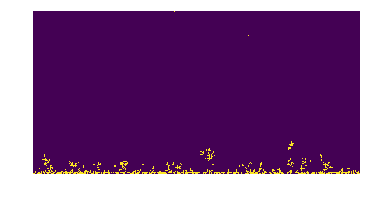

i= 14000 	x=405 	y=10 	yStart=52


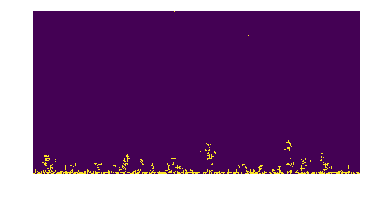

i= 15000 	x=177 	y=22 	yStart=55


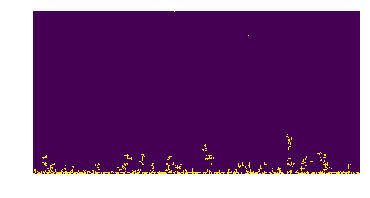

i= 16000 	x=223 	y=36 	yStart=60


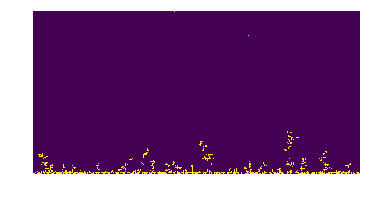

i= 17000 	x=223 	y=25 	yStart=65


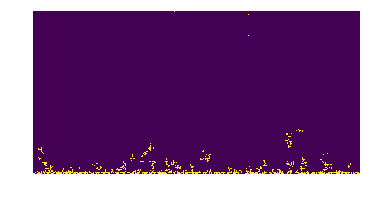

i= 18000 	x=106 	y=7 	yStart=68


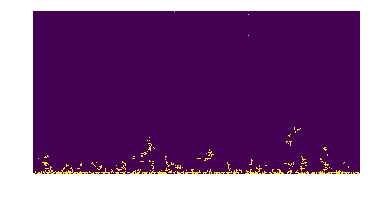

i= 19000 	x=250 	y=12 	yStart=69


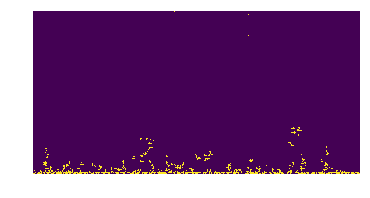

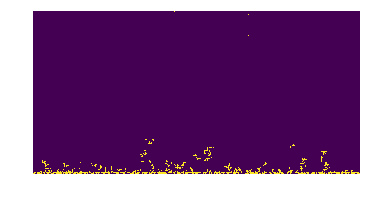

q is 47.0 %
I am including this because at 47% its even more clear what happens when q is greater than the critical value.


In [13]:
yBuffer = 5
yStart  = 1 + yBuffer
nParticles = 20000
maxX = 420
maxY = 210
A = np.zeros((maxX, maxY))
A[:,0] = 1
#print(A.transpose())
q=.47


for i in range(0,nParticles):
    # Compute new starting point on the line y=yStart
    x  = np.random.randint(0,maxX)
    y  = yStart; #always start at upper limit
    n=0
    P=p
    while True:
        xOrg = x
        yOrg = y

        r = np.random.random(); # Random float:  0.0 <= r < 1.0
        #based on the value of 'r', move the particle
        #left, right, up, or down and change x and y accordingly
        ...
        if r<0.25:
            #left
            x=x-1
        else:
            if r<.50:
                #right
                x=x+1
            else:
                if r<.75:
                    #up
                    y=y+1
                else:
                    #down
                    y=y-1
            
        #now apply periodic boundary conditions to 'x'
        ...
        if(x<0):
            x=maxX-1
        if(x==maxX):
            x=0
        
        if (A[x,y] == 1 or y>yStart):
            #if p < np.random.random():
                x = xOrg
                y = yOrg
                continue; # if this site has been taken try moving in a different direction
        
        #determine the x coordionates of the left and right neighbors
        #store them in 'xm' and 'xp' and apply periodic boundary conditions again
        xp = (x+1)
        xm = (x-1)
        yp = (y+1)
        ym = (y-1)
        if(xp==maxX):
            xp=0
        if(xm<0):
            xm=maxX-1
        if(yp==maxY):
            yp=0
        if(ym<0):
            ym=maxY-1
        
                            
        
            
            
        # Determine if any neighboring site is occupied
        # if that is the case, enter the following 'if' clause
        if (A[xp,y]==1 or A[xm,y]==1 or A[x,yp]==1 or A[x,ym]==1):
            if np.random.random()<q:
                if A[xp,y]==1 and y!=1:
                    A[xp,y]=0
                if A[xm,y]==1 and y!=1:
                    A[xm,y]=0
                if A[x,yp]==1 and yp!=1:
                    A[x,yp]=0
                if A[x,ym]==1 and ym!=1:
                    A[x,ym]=0
            else:
                A[x,y] = 1
                if (y+yBuffer>yStart and y+yBuffer<maxY): 
                    yStart = y+yBuffer

                if (i%1000==0): 
                    print(f'i= {i} \tx={x} \ty={y} \tyStart={yStart}')

                nNewParticlesPerFrame = 1000 
                if (i%nNewParticlesPerFrame==0): 
                    display(A)
                
                break # particle was attached, break out of current loop and insert next one
            
    if (yStart+1==maxY): 
        print(f'Structures reached Y limit after only {i} particles')

display(A)
print('q is',q*100,'%')        
print('I am including this because at 47% its even more clear what happens when q is greater than the critical value.')

i= 0 	x=319 	y=1 	yStart=6


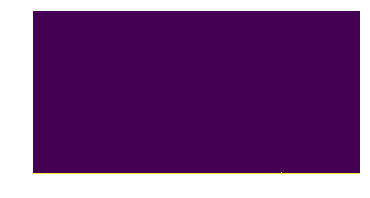

i= 1000 	x=383 	y=7 	yStart=18


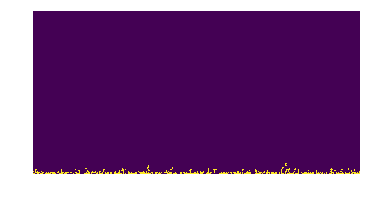

i= 2000 	x=126 	y=7 	yStart=19


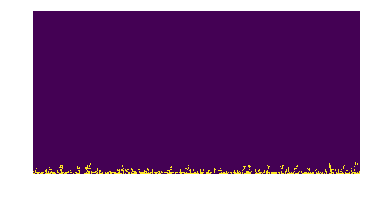

i= 3000 	x=110 	y=9 	yStart=30


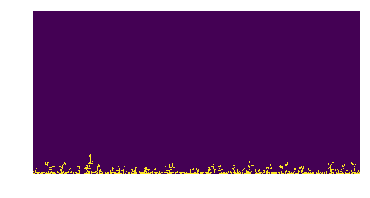

i= 4000 	x=84 	y=13 	yStart=33


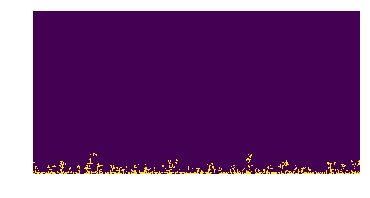

i= 5000 	x=411 	y=19 	yStart=38


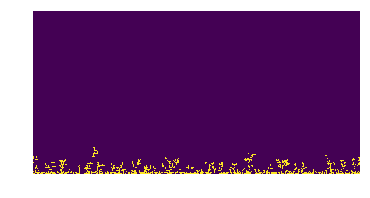

i= 6000 	x=219 	y=20 	yStart=48


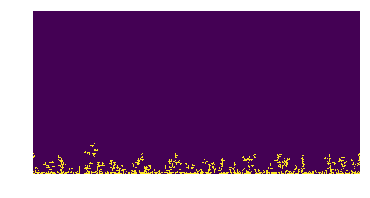

i= 7000 	x=87 	y=41 	yStart=52


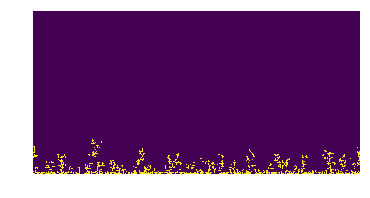

i= 8000 	x=140 	y=40 	yStart=57


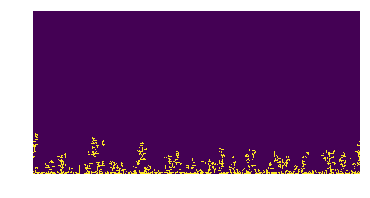

i= 9000 	x=274 	y=36 	yStart=58


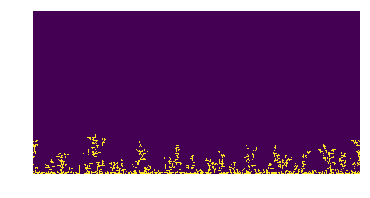

i= 10000 	x=85 	y=60 	yStart=65


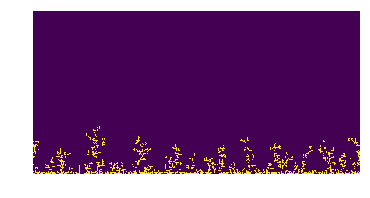

i= 11000 	x=86 	y=46 	yStart=68


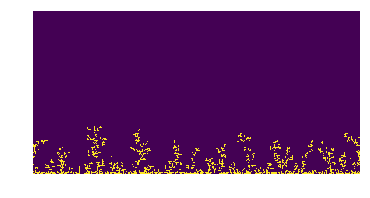

i= 12000 	x=180 	y=43 	yStart=71


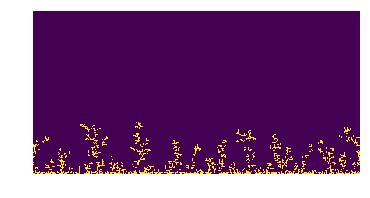

i= 13000 	x=20 	y=53 	yStart=81


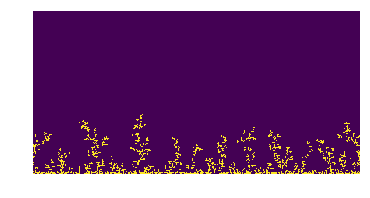

i= 14000 	x=395 	y=74 	yStart=94


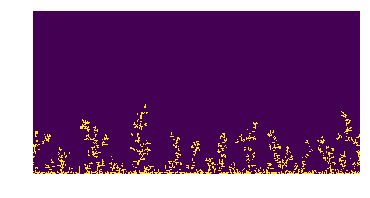

i= 15000 	x=279 	y=65 	yStart=104


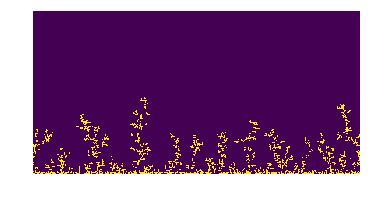

i= 16000 	x=76 	y=67 	yStart=108


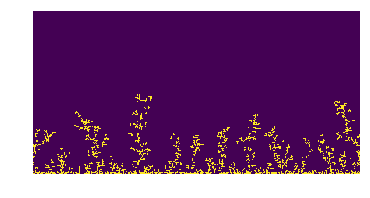

i= 17000 	x=128 	y=107 	yStart=113


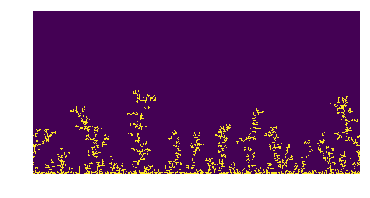

i= 18000 	x=0 	y=72 	yStart=118


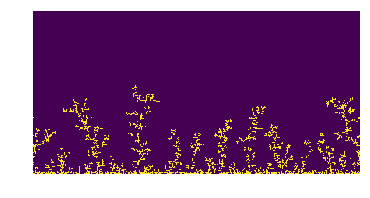

i= 19000 	x=275 	y=88 	yStart=121


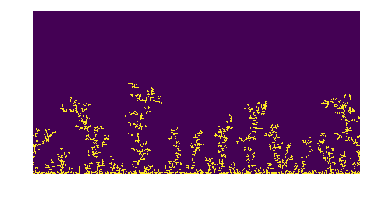

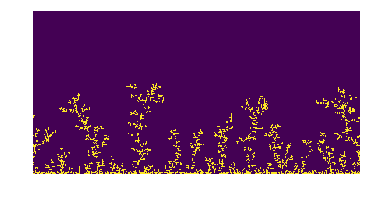

q is 42.0 %


In [14]:
yBuffer = 5
yStart  = 1 + yBuffer
nParticles = 20000
maxX = 420
maxY = 210
A = np.zeros((maxX, maxY))
A[:,0] = 1
#print(A.transpose())
q=.42


for i in range(0,nParticles):
    # Compute new starting point on the line y=yStart
    x  = np.random.randint(0,maxX)
    y  = yStart; #always start at upper limit
    n=0
    P=p
    while True:
        xOrg = x
        yOrg = y

        r = np.random.random(); # Random float:  0.0 <= r < 1.0
        #based on the value of 'r', move the particle
        #left, right, up, or down and change x and y accordingly
        ...
        if r<0.25:
            #left
            x=x-1
        else:
            if r<.50:
                #right
                x=x+1
            else:
                if r<.75:
                    #up
                    y=y+1
                else:
                    #down
                    y=y-1
            
        #now apply periodic boundary conditions to 'x'
        ...
        if(x<0):
            x=maxX-1
        if(x==maxX):
            x=0
        
        if (A[x,y] == 1 or y>yStart):
            #if p < np.random.random():
                x = xOrg
                y = yOrg
                continue; # if this site has been taken try moving in a different direction
        
        #determine the x coordionates of the left and right neighbors
        #store them in 'xm' and 'xp' and apply periodic boundary conditions again
        xp = (x+1)
        xm = (x-1)
        yp = (y+1)
        ym = (y-1)
        if(xp==maxX):
            xp=0
        if(xm<0):
            xm=maxX-1
        if(yp==maxY):
            yp=0
        if(ym<0):
            ym=maxY-1
        
                            
        
            
            
        # Determine if any neighboring site is occupied
        # if that is the case, enter the following 'if' clause
        if (A[xp,y]==1 or A[xm,y]==1 or A[x,yp]==1 or A[x,ym]==1):
            if np.random.random()<q:
                if A[xp,y]==1 and y!=1:
                    A[xp,y]=0
                if A[xm,y]==1 and y!=1:
                    A[xm,y]=0
                if A[x,yp]==1 and yp!=1:
                    A[x,yp]=0
                if A[x,ym]==1 and ym!=1:
                    A[x,ym]=0
            else:
                A[x,y] = 1
                if (y+yBuffer>yStart and y+yBuffer<maxY): 
                    yStart = y+yBuffer

                if (i%1000==0): 
                    print(f'i= {i} \tx={x} \ty={y} \tyStart={yStart}')

                nNewParticlesPerFrame = 1000 
                if (i%nNewParticlesPerFrame==0): 
                    display(A)
                
                break # particle was attached, break out of current loop and insert next one
            
    if (yStart+1==maxY): 
        print(f'Structures reached Y limit after only {i} particles')

display(A)
print('q is',q*100,'%')        